In [ ]:
from netCDF4 import Dataset

In [40]:
rootgrp = Dataset("raw_data/tds1/2015-04-01-H00-ddm.nc", "r", format="NETCDF4")
metagrp = Dataset("raw_data/tds1/2015-04-01-H00-metadata.nc", "r", format="NETCDF4")

print(rootgrp)
print(metagrp)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Name: MERRByS L1b DDM File
    date_created: 2017-11-14T20:48:38
    data_use_license: Creative Commons License: TDS-1 GNSS-R Dataset. Surrey Satellite Technology Ltd. Creative Commons Attribution-NonCommercial 4.0 International License - http://creativecommons.org/licenses/by-nc/4.0/
    FileIDCode: 2015-04/01/H00
    dimensions(sizes): 
    variables(dimensions): 
    groups: 000000, 000001, 000002, 000003, 000004, 000005, 000006, 000007, 000008, 000009, 000010, 000011, 000012, 000013, 000014, 000015, 000016, 000017, 000018, 000019, 000020, 000021, 000022, 000023, 000024, 000025, 000026, 000027, 000028, 000029, 000030, 000031, 000032, 000033, 000034, 000035, 000036, 000037, 000038, 000039, 000040, 000041, 000042, 000043, 000044, 000045, 000046, 000047, 000048, 000049, 000050, 000051, 000052, 000053, 000054, 000055, 000056, 000057, 000058, 000059, 000060, 000061, 000062, 000063, 000064, 000065, 0

In [ ]:
def walktree(top):
    values = top.groups.values()
    yield values
    for value in top.groups.values():
        for children in walktree(value):
            yield children
            
for element in walktree(rootgrp):
    print(element)

In [ ]:
print(rootgrp.groups['000001'].variables['DDM'])

In [ ]:
from datetime import datetime
from dateutil import tz

def datenum_to_pytime(matlab_datenum):
    python_datetime = datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days = 366)
    return python_datetime

def to_utc(python_datetime):
    return python_datetime.replace(tzinfo=tz.gettz('UTC'))
    
matlab_datenum = 736054.8750082987
print(datenum_to_pytime(matlab_datenum))
print(to_utc(datenum_to_pytime(matlab_datenum)))

index = 0;
for datenum in rootgrp.groups['000051'].variables['IntegrationMidPointTime']:
    print(str(datenum) + ' - ' + str(datenum_to_pytime(float(datenum))) + ' - ' + str(index))
    index = index + 1
#python_datetime.strftime('%m/%d/%Y')

736023.6795478124
2015-02-28 16:18:32.930995


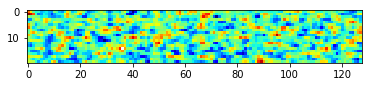

In [37]:
#rootgrp.groups['000100'].variables['IntegrationMidPointTime']:
'''
736055.0135948148 - 2015-04-01 00:19:34.592000 - 219
736055.0136063888 - 2015-04-01 00:19:35.591994 - 220
736055.013617963 - 2015-04-01 00:19:36.591999 - 221
736055.013629537 - 2015-04-01 00:19:37.591993 - 222
'''

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
fig = plt.figure()

ddm = rootgrp.groups['000051'].variables['DDM'][130]
im = plt.imshow(ddm, cmap='jet', animated=True)

datenum = rootgrp.groups['000051'].variables['IntegrationMidPointTime'][149]
print(datenum)
print(datenum_to_pytime(float(datenum)))


def animate(i):
    ddm = rootgrp.groups['000051'].variables['DDM'][i]
    im.set_array(ddm)
    return im
# total number of frames = 85146
ani = animation.FuncAnimation(fig, animate, frames=500, interval=100)
#Play video
HTML(ani.to_html5_video())
